In [6]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import os
import cv2

from StereoNet.StereoNet import StereoNet
from utils.read_data import *

device = torch.device("cuda:0" if torch.cuda.is_available else "cpu")

In [7]:
# left_path = '/home/lab1/datasets/DFC2019_track2_grayscale_8bit/Track2-RGB-1/JAX_022_011_004_LEFT_RGB.tif'
# right_path = '/home/lab1/datasets/DFC2019_track2_grayscale_8bit/Track2-RGB-1/JAX_022_011_004_RIGHT_RGB.tif'
# disp_path = '/home/lab1/datasets/DFC2019_track2_grayscale_8bit/Track2-RGB-1/JAX_022_011_004_LEFT_AGL.tif'
left_path = '/home/lab1/datasets/whu_stereo_8bit/with_ground_truth/test/left/HY_left_15.tiff'
right_path = '/home/lab1/datasets/whu_stereo_8bit/with_ground_truth/test/right/HY_right_15.tiff'
# disp_path = '/home/lab1/datasets/whu_stereo_8bit/with_ground_truth/test/disp/HY_disparity_15.tiff'
# left_path = './img/left1.png'
# right_path = './img/right1.png'
# disp_path = './img/JAX_004_009_007_LEFT_AGL.tif'
size = [1024, 1024]


In [8]:
img_l = read_img(left_path, size)
img_r = read_img(right_path, size)

tensor_l = img_norm(img_l)
tensor_r = img_norm(img_r)

if img_l.dtype == 'uint16':
    tensor_l = tensor_l.unsqueeze(0).repeat(1,3,1,1).to(device)
    tensor_r = tensor_r.unsqueeze(0).repeat(1,3,1,1).to(device)
else:
    tensor_l = tensor_l.unsqueeze(0).to(device)
    tensor_r = tensor_r.unsqueeze(0).to(device)
print(tensor_l.shape)

torch.Size([1, 3, 1024, 1024])


In [9]:
# disp, valid = read_disp_whu(disp_path, size, -64, 64)
# disp_tensor = torch.from_numpy(disp).float()
# vaild_tensor = torch.from_numpy(valid).bool()
# disp[~valid] = 0
# print(disp.max(), disp.min())
# fig = plt.figure(figsize=(6,4))
# plt.figure(1)
# im1 = plt.imshow(disp, cmap='gray')
# plt.colorbar(im1)
# plt.show()

In [10]:
net = StereoNet(image_channel=3, k=3, refinement_time=4)
net.load_state_dict(torch.load('checkpoints/WHUStereo/StereoNet4_WHUStereo.pth'), strict=True)
# net.eval()
net = net.to(device)


14.920725 -36.021786


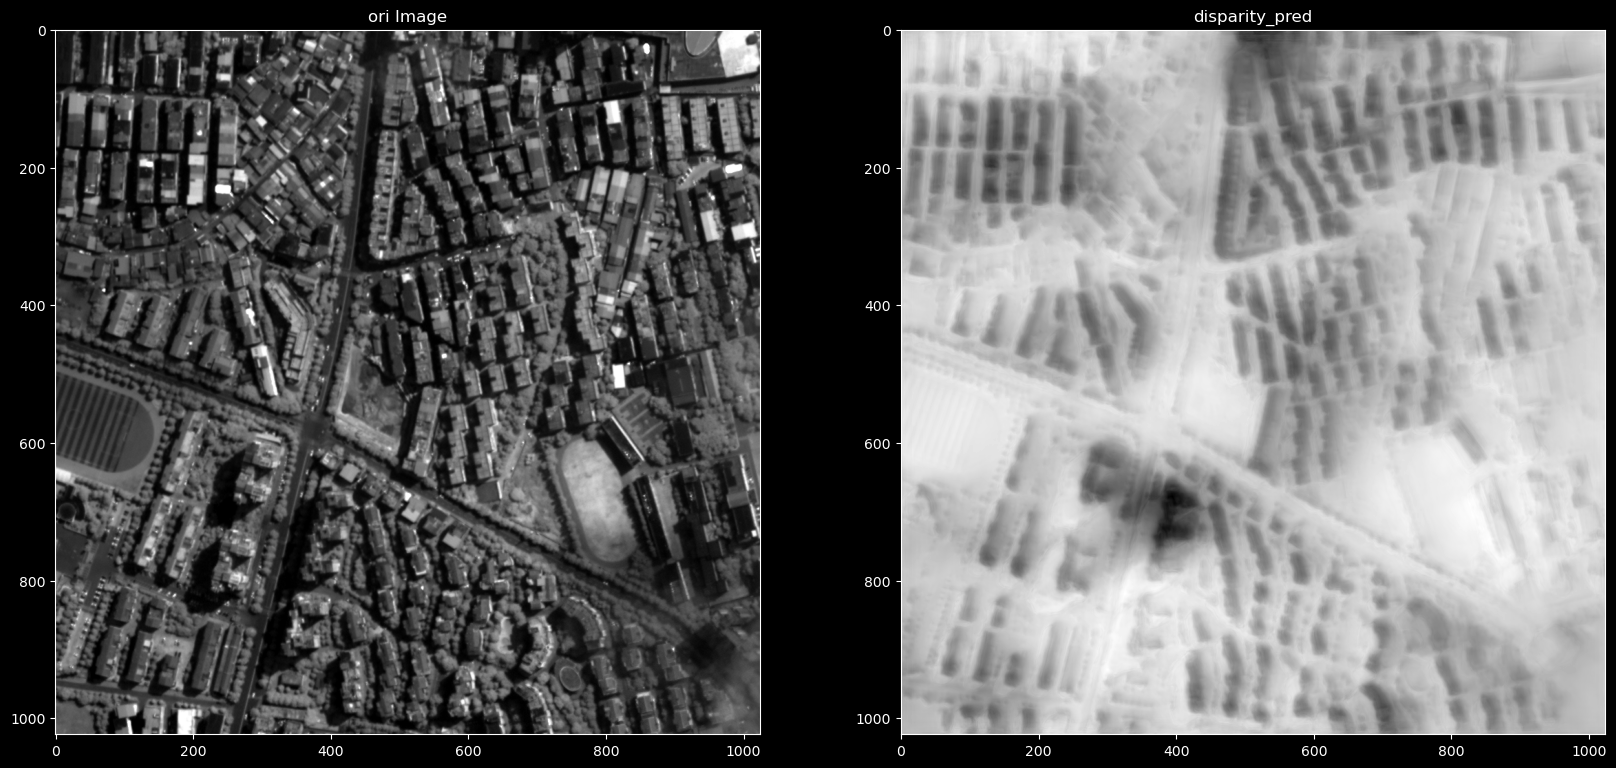

In [11]:
with torch.no_grad():
    disp_list = net(tensor_l, tensor_r, -128, 128)
    disp_pred = disp_list[-1].squeeze().cpu().numpy()
    print(disp_pred.max(), disp_pred.min())
#visualize
if img_l.dtype == 'uint16':
    img_l = img_l.squeeze(2)
f, axis = plt.subplots(1, 2, figsize = (20,60))
axis[0].imshow(img_l)
# axis[0].imshow(disp_pred, alpha=0.5)
axis[0].set_title('ori Image')
axis[1].imshow(disp_pred, cmap='gray')
axis[1].set_title('disparity_pred')
plt.show()

In [12]:
os.makedirs("demo_output", exist_ok=True)
cv2.imwrite('./demo_output/img.tif', disp_pred)

True